## Data set 01
- Car evaluation: https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Data cleaning

In [10]:
data = pd.read_csv("car.data")

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#knn
#from sklearn import neighbors, metrics
#from sklearn.model_selection import train_test_split



X = data[["buying",
         "maint",
          "doors",
          "persons",
          "lug_boot",
         "safety"]].values
y = data[["class"]]

# lei convert x
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform( X[:, i])
    
# lei convert y
label_mapping = {
    'unacc':0,
    'acc': 1,
    'good':2,
    'vgood':3
}
y["class"] = y["class"].map(label_mapping) 
y = np.array(y)


<ipython-input-10-8195cbb3626c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].map(label_mapping)


## Split Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## 1. Decision tree model

In [13]:
import time
start_time = time.time()

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier(max_leaf_nodes = 10)
dt_model.fit(X_train, y_train)

predictions = dt_model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print("Run time: --- %s seconds ---" % (time.time() - start_time))
print(acc)

Run time: --- 0.0039904117584228516 seconds ---
0.8439306358381503


## Neural_network - Undone

In [ ]:
# count run time
import time
start_time = time.time()

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)


## 4. SVM

In [14]:
# count run time
import time
start_time = time.time()

# sklearn svm
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score

X = data[["buying",
         "maint",
          "doors",
          "persons",
          "lug_boot",
         "safety"]].values
y = data[["class"]]

# SVM model- linear
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
linear_svc.fit(X_train, y_train)

linear_predictions = linear_svc.predict(X_test)
linear_acc = accuracy_score(y_test, linear_predictions)

print("linear accuracy", linear_acc)
#print("Run time: --- %s seconds ---" % (time.time() - start_time))

# SVM model-rbf
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
rbf_svc.fit(X_train, y_train)

rbf_predictions = rbf_svc.predict(X_test)
rbf_acc = accuracy_score(y_test, rbf_predictions)

print("rbf accuracy", rbf_acc)
#print("Run time: --- %s seconds ---" % (time.time() - start_time))

linear accuracy 0.7225433526011561
rbf accuracy 0.9104046242774566


C:\Users\wang1\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wang1\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 5.KNN

In [18]:
# count run time
import time
start_time = time.time()

# sklearn KNN
from sklearn import neighbors, metrics

# create KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)

#print("predictions: ", prediction)
print("accuracy: ", accuracy)

print("Run time: --- %s seconds ---" % (time.time() - start_time))

accuracy:  0.7890173410404624
Run time: --- 0.020089387893676758 seconds ---


C:\Users\wang1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy:  0.7572254335260116


C:\Users\wang1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


346


Text(0, 0.5, 'y-axis')

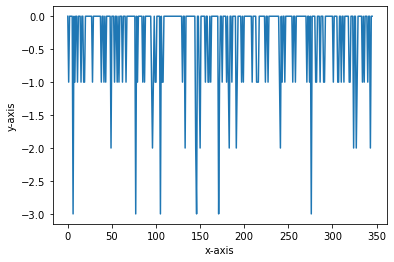

In [38]:
# print(X_test.shape[0])

# predction compare to y_test
diff = []
for i in range(X_test.shape[0]):
    diff.append(prediction[i]- y_test[i])

import matplotlib.pyplot as plt

x_axis = [i for i in range(X_test.shape[0])]

plt.plot(x_axis, diff)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

